## Import libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

C:\Users\Sadia Mahjabin\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## load data

In [2]:
df = pd.read_csv('G:/Jupyter/Diabetes Prediction/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

 1: diabetic
 
 0: non diabetic

In [7]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


### Seperating label from data

In [8]:
X= df.drop(columns='Outcome', axis=1)
Y= df['Outcome']

In [9]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [10]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## Data Standardization

In [11]:
scaler= StandardScaler()
scaler.fit(X)
X= scaler.transform(X)

In [12]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

## Train test split

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [14]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


## Training model with SVM

In [15]:
classifier = svm.SVC(kernel='linear')

In [16]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

## Model evaluation

In [17]:
# accuracy score on the training data
X_train_prediction_SVC = classifier.predict(X_train)
training_data_accuracy_SVC = accuracy_score(X_train_prediction_SVC, Y_train)

In [18]:
print('Accuracy score of the training data : ', training_data_accuracy_SVC)

Accuracy score of the training data :  0.7866449511400652


In [19]:
# accuracy score on the test data
X_test_prediction_SVC = classifier.predict(X_test)
test_data_accuracy_SVC = accuracy_score(X_test_prediction_SVC, Y_test)

In [20]:
print('Accuracy score of the test data : ', test_data_accuracy_SVC)

Accuracy score of the test data :  0.7727272727272727


## Training model with KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [23]:
neigh.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
##Model evaluation

# accuracy score on the training data
X_train_prediction_KNN = neigh.predict(X_train)
training_data_accuracy_KNN = accuracy_score(X_train_prediction_KNN, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy_KNN)

# accuracy score on the test data
X_test_prediction_KNN = neigh.predict(X_test)
test_data_accuracy_KNN = accuracy_score(X_test_prediction_KNN, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy_KNN)

Accuracy score of the training data :  0.8648208469055375
Accuracy score of the test data :  0.6948051948051948


## Training model with naive bayes

In [25]:
from sklearn.naive_bayes import GaussianNB

In [26]:
gnb = GaussianNB()

In [27]:
gnb.fit(X_train, Y_train)

GaussianNB()

In [28]:
## Model evaluation

# accuracy score on the training data
X_train_prediction_NB = gnb.predict(X_train)
training_data_accuracy_NB = accuracy_score(X_train_prediction_NB, Y_train)

print('Accuracy score of the training data : ', training_data_accuracy_NB)

# accuracy score on the test data
X_test_prediction_NB = gnb.predict(X_test)
test_data_accuracy_NB = accuracy_score(X_test_prediction_NB, Y_test)

print('Accuracy score of the test data : ', test_data_accuracy_NB)

Accuracy score of the training data :  0.755700325732899
Accuracy score of the test data :  0.7727272727272727


## Training Model with decision tree

In [29]:
from sklearn import tree

In [30]:
clf = tree.DecisionTreeClassifier(max_depth=4, random_state=2)

In [31]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=4, random_state=2)

In [32]:
## Model evaluation

# accuracy score on the training data
X_train_prediction_DT = clf.predict(X_train)
training_data_accuracy_DT = accuracy_score(X_train_prediction_DT, Y_train)

print('Accuracy score of the training data : ', training_data_accuracy_DT)

# accuracy score on the test data
X_test_prediction_DT = clf.predict(X_test)
test_data_accuracy_DT = accuracy_score(X_test_prediction_DT, Y_test)

print('Accuracy score of the test data : ', test_data_accuracy_DT)

Accuracy score of the training data :  0.7980456026058632
Accuracy score of the test data :  0.7467532467532467


## Training model with random forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rclf = RandomForestClassifier(max_depth=4, random_state=2)

In [35]:
rclf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=4, random_state=2)

In [36]:
## Model evaluation

# accuracy score on the training data
X_train_prediction_RF = rclf.predict(X_train)
training_data_accuracy_RF = accuracy_score(X_train_prediction_RF, Y_train)

print('Accuracy score of the training data : ', training_data_accuracy_RF)

# accuracy score on the test data
X_test_prediction_RF = rclf.predict(X_test)
test_data_accuracy_RF = accuracy_score(X_test_prediction_RF, Y_test)

print('Accuracy score of the test data : ', test_data_accuracy_RF)

Accuracy score of the training data :  0.8241042345276873
Accuracy score of the test data :  0.7467532467532467


## Training model with regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
reg= LogisticRegression()

In [39]:
reg.fit(X_train, Y_train)

LogisticRegression()

In [40]:
## Model evaluation

# accuracy score on the training data
X_train_prediction_LR = reg.predict(X_train)
training_data_accuracy_LR = accuracy_score(X_train_prediction_LR, Y_train)

print('Accuracy score of the training data : ', training_data_accuracy_LR)

# accuracy score on the test data
X_test_prediction_LR = reg.predict(X_test)
test_data_accuracy_LR = accuracy_score(X_test_prediction_LR, Y_test)

print('Accuracy score of the test data : ', test_data_accuracy_LR)

Accuracy score of the training data :  0.7850162866449512
Accuracy score of the test data :  0.7597402597402597


## Visualization

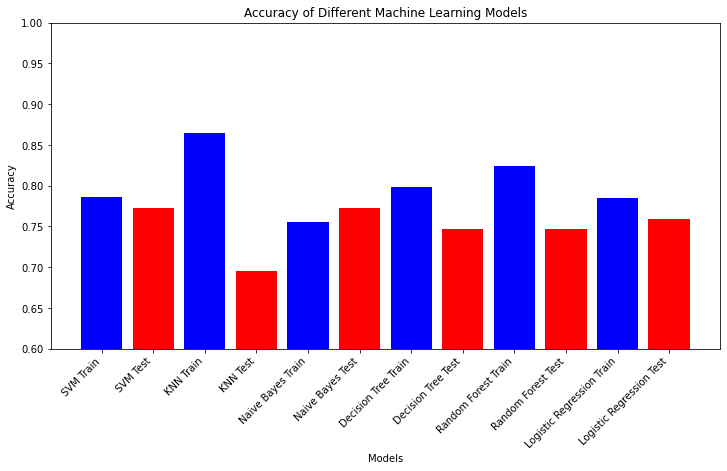

In [42]:
import matplotlib.pyplot as plt

# Accuracy scores obtained from your model evaluations
accuracies = [training_data_accuracy_SVC, test_data_accuracy_SVC,
              training_data_accuracy_KNN, test_data_accuracy_KNN,
              training_data_accuracy_NB, test_data_accuracy_NB,
              training_data_accuracy_DT, test_data_accuracy_DT,
              training_data_accuracy_RF, test_data_accuracy_RF,
              training_data_accuracy_LR, test_data_accuracy_LR]

models = ['SVM Train', 'SVM Test', 'KNN Train', 'KNN Test',
          'Naive Bayes Train', 'Naive Bayes Test',
          'Decision Tree Train', 'Decision Tree Test',
          'Random Forest Train', 'Random Forest Test',
          'Logistic Regression Train', 'Logistic Regression Test']

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(models, accuracies, color=['blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Machine Learning Models')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.6, 1.0)  # Set the y-axis range if needed
plt.show()
